## Transitive closure of a matrix

In [146]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 

In [147]:
# Warshall Algorithm
def Warshall(a):
    n = len(a)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                a[i][j] = a[i][j] or (a[i][k] and a[k][j])
    return a

# Utility method used for binary matrix multiplication
def binaryMatrixMultiplication(matrix_1, matrix_2):
    n = len(matrix_1)
    result = [[0 for x in range(n)] for y in range(n)] 
    for i in range(n):
            for j in range(n):
                value = False
                for k in range(n):
                    value = value or matrix_1[i][k] and matrix_2[k][j]
                    if(value):
                        break
                result[i][j] = value
    return result

# Naive Alogrithm
def Naive(input_matrix):
    a = input_matrix
    n = len(a)
    W = a
    arr = [] # List of w1, w2, w3, w4 .... wn
    for iterations in range(n):
        temp = binaryMatrixMultiplication(W, a) # Total 4 loops including matrix multiplication
        arr.append(a) if iterations == 1 else arr.append(temp)
        W = temp
    # W1 or W2 or W3 ..... or Wn
    transitive_closure = [[0 for x in range(n)] for y in range(n)]
    for iterations in range(n):
        transitive_closure = transitive_closure or arr[iterations]
    return transitive_closure

In [148]:
# Begin of code execution
warshall_end = []
naive_end = []
order_arr = np.arange(10, 101)

for i in range(10, 101):
    input_matrix = [[random.randint(0, 1) for K in range(i)] for P in range(i)]
    one = input_matrix
    two = input_matrix

    start = datetime.now()
    Warshall(one)
    end = datetime.now() - start
    warshall_end.append(end.total_seconds())

    start_2 = datetime.now()
    Naive(two)
    end_2 = datetime.now() - start_2
    naive_end.append(end_2.total_seconds())
    

print("Length of warshall array:", len(warshall_end))
print("Length of order array:", len(order_arr))



Length of warshall array: 91
Length of order array: 91


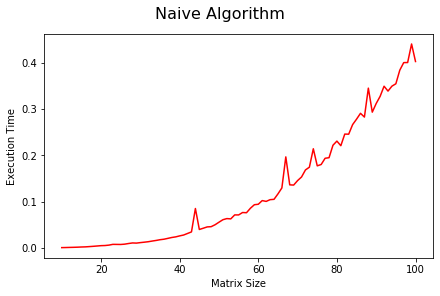

In [149]:
# Normal plot for Naive on order vs execution time
fig, axs = plt.subplots(1, 0, constrained_layout=True)
plt.plot(order_arr,naive_end,c='r',label='naive')
plt.xlabel("Matrix Size")
plt.ylabel("Execution Time")
fig.suptitle('Naive Algorithm', fontsize=16)
plt.show()

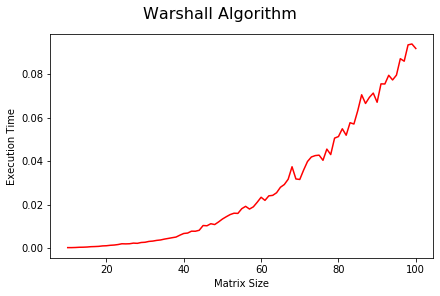

In [150]:
# Normal plot for Warshall on order vs execution time
fig, axs = plt.subplots(1, 0, constrained_layout=True)
plt.plot(order_arr,warshall_end,c='r',label='warshall')
plt.xlabel("Matrix Size")
plt.ylabel("Execution Time")
fig.suptitle('Warshall Algorithm', fontsize=16)
plt.show()

Warshall's slope and intercept:  2.785130408135838 -15.2164066256369
Naive's slope and intercept:  2.8559269176853186 -14.033752004709246


<Figure size 432x288 with 0 Axes>

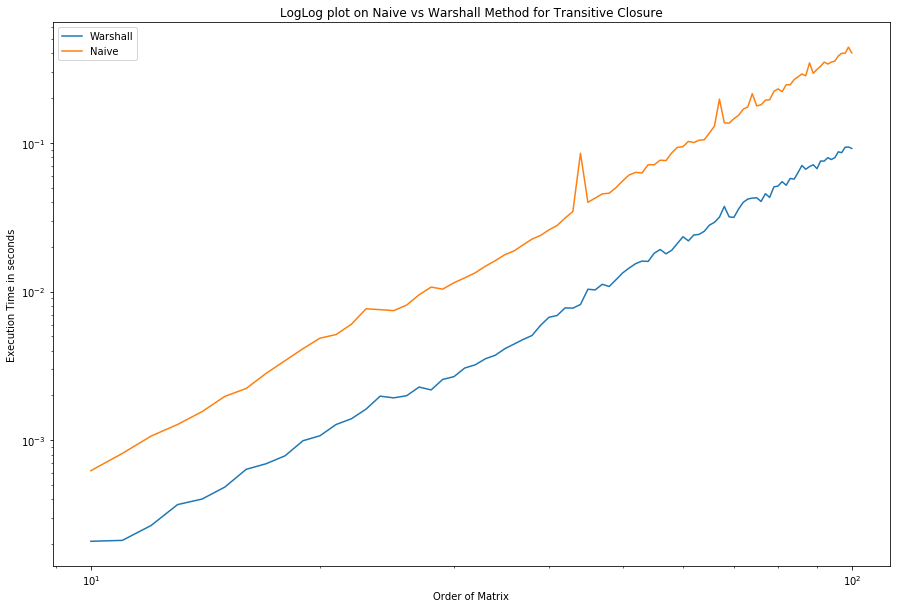

In [151]:
# Calculating the slope and intercept
slope, intercept = np.polyfit(np.log(order_arr), np.log(warshall_end), 1)
print("Warshall's slope and intercept: ", slope, intercept)

slope, intercept = np.polyfit(np.log(order_arr), np.log(naive_end), 1)
print("Naive's slope and intercept: ", slope, intercept)

# LogLog plot on Naive vs Warshall Method for Transitive Closure
fig, axs = plt.subplots(1, 0, constrained_layout=True)
plt.figure(figsize=(15,10))
plt.loglog(order_arr, warshall_end, label = "Warshall")
plt.loglog(order_arr, naive_end, label = "Naive")
plt.xlabel("Order of Matrix")
plt.ylabel("Execution Time in seconds")
plt.legend()

plt.title("LogLog plot on Naive vs Warshall Method for Transitive Closure")
plt.savefig('final.png')
plt.show()
